In [92]:
import sys
sys.path.append("/home/preetu/.local/lib/python3.8/site-packages")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [93]:
df=pd.read_csv('gapminder.csv')

In [94]:
df.head()

,Unnamed: 0,country,year,population,continent,life_exp,gdp_cap
0,11,Afghanistan,2007,31889923,Asia,43.828,974.580338
1,23,Albania,2007,3600523,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216,Africa,72.301,6223.367465
3,47,Angola,2007,12420476,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927,Americas,75.320,12779.379640


In [95]:
df.isnull().sum()

Unnamed: 0    0
country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64

In [96]:
df.columns = df.columns.str.replace('continent', 'Region')

In [97]:
df.columns = df.columns.str.replace('life_exp', 'life')

In [98]:
df

,Unnamed: 0,country,year,population,Region,life,gdp_cap
0,11,Afghanistan,2007,31889923,Asia,43.828,974.580338
1,23,Albania,2007,3600523,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216,Africa,72.301,6223.367465
3,47,Angola,2007,12420476,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...,...,...
137,1655,Vietnam,2007,85262356,Asia,74.249,2441.576404
138,1667,West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
139,1679,"Yemen, Rep.",2007,22211743,Asia,62.698,2280.769906
140,1691,Zambia,2007,11746035,Africa,42.384,1271.211593


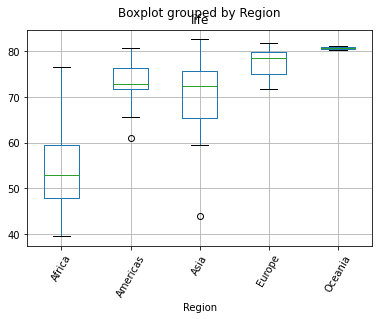

In [99]:
# Create a boxplot of life expectancy per region
df.boxplot('life','Region', rot=60)
plt.show()

In [100]:
df_region = pd.get_dummies(df)

In [101]:
print(df_region.columns)

Index(['Unnamed: 0', 'year', 'population', 'life', 'gdp_cap',
       'country_Afghanistan', 'country_Albania', 'country_Algeria',
       'country_Angola', 'country_Argentina',
       ...
       'country_Vietnam', 'country_West Bank and Gaza', 'country_Yemen, Rep.',
       'country_Zambia', 'country_Zimbabwe', 'Region_Africa',
       'Region_Americas', 'Region_Asia', 'Region_Europe', 'Region_Oceania'],
      dtype='object', length=152)


In [102]:
# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df,drop_first=True)

In [103]:
# Print the new columns of df_region
print(df_region.columns)

Index(['Unnamed: 0', 'year', 'population', 'life', 'gdp_cap',
       'country_Albania', 'country_Algeria', 'country_Angola',
       'country_Argentina', 'country_Australia',
       ...
       'country_Venezuela', 'country_Vietnam', 'country_West Bank and Gaza',
       'country_Yemen, Rep.', 'country_Zambia', 'country_Zimbabwe',
       'Region_Americas', 'Region_Asia', 'Region_Europe', 'Region_Oceania'],
      dtype='object', length=150)


In [104]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [105]:

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5,normalize=True)
print(ridge)

Ridge(alpha=0.5, normalize=True)


In [106]:
X= df_region.drop('life',axis=1).values
y=df_region['life'].values

In [ ]:
# Perform 5-fold cross-validation: ridge_cv
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(with_mean=False), Ridge())
ridge_cv = cross_val_score(ridge,X,y,cv=5)

In [108]:
# Print the cross-validated scores
print(ridge_cv)

[0.34544131 0.52454529 0.35428588 0.45883666 0.39801663]
